In [21]:
#%% Modules
import pyvisa as visa
import awg_support as awg
import numpy as np 
import matplotlib.pyplot as plt
import csv
import time
import serial

In [22]:
#%% Initialisation
# Setup for the tools
ID_awg = 'USB0::0xF4EC::0x1102::SDG2XFBC7R0482::INSTR'
rm = awg.resourcer()
inst_awg = awg.initialise(ID_awg, rm)

In [23]:
#noise parameters
sd = 1.1
Ts = 1/8e6
tw = np.arange(0, 1, Ts)

In [24]:
awg.set_output_state(inst_awg,channel=2,val="ON")
wave = np.random.normal(0,sd,size=np.shape(tw))
awg.arb_wave_constructor(inst_awg, wave, tw,freq=80e3,channel=2)

In [25]:
def run(ser):
    bit_hex = []
    while True:
        if ser.in_waiting > 0:
                try:
                    line = ser.readline()
                    val = line.decode('utf-8').strip()  # Attempt to decode as UTF-8
                    #print(val)
                    if(val == "Hex:"):
                        line = ser.readline()
                        val = line.decode('utf-8').strip()  # Attempt to decode as UTF-8
                        hex_val = hex(int(val, 16))
                        bit_hex.append(hex_val)
                        print(hex_val)
                    elif(val == "end"):
                        print("end")
                        break                        
                except ValueError:
                    continue
                except UnicodeDecodeError:
                    print("error")
    return bit_hex

In [26]:
ser = serial.Serial('COM3', 115200, timeout=1)
TRNG = run(ser)

0x4f8d
0xfecf
0xcfd9
0x17c0
0xb73
0xf8
0xef06
0xd900
0xd0e3
0xe760
0xde
0x7018
0x2079
0x800
0x26f7
0x7600
0xefd
0x3040
0xc118
0xd1
0x8d2e
0x4d48
0x40e2
0x1e
0x1b
0x18e
0x49c
0x3c76
0xbacd
0xb06d
0x2202
0xde5c
0x1f00
0xbf02
0xdf5e
0x39f8
0x8ce8
0xd9bf
0xc182
0x7707
0x6df
0x62c6
0xd86
0x1c3d
0x13f0
0xe0f1
0x830
0x7d
0x63df
0x8c02
0x6100
0xa000
0x80df
0xc81
0x2d2e
0x373
0x10b
0x4c0f
0xc37f
0x1627
0xc118
0x10ef
0xfd50
0xdf01
0x433
0x10ee
0xc08f
0xbaee
0x780d
0xfcb8
0x80c9
0xf00f
0xc49d
0xe8c3
0xe65e
0x1c1a
0x27
0xcf1
0x18
0x580b
0x1f7
0x6ff2
0x1fa
0x1e61
0x63c3
0x9e19
0x48ed
0x63cc
0x4300
0x13c3
0x72b
0x3d4
0x318c
0x7002
0xddc0
0xc2d0
0x9800
0x1c03
0x659
0xd0db
0x3662
0xdb9c
0x8991
0x90
0x61f0
0x603f
0x101f
0x1a1c
0x801
0x100
0x7444
0x6463
0x10e3
0x5b40
0x40cc
0x5f88
0xfc5f
0x66ce
0xc1c6
0xc0e3
0x70e8
0x30e
0x39e3
0x506
0xe0f8
0xcd88
0x4433
0x8a3f
0xcb10
0xc0cc
0x372c
0x6c79
0xd6d
0xdd00
0xd30e
0x3fa
0x8860
0x63ee
0xce1e
0xde38
0xc8
0x1b
0x79e1
0xc833
0x6721
0x1d
0xc877
0x6d83
0x406d
0x316

KeyboardInterrupt: 

In [35]:
ser.close()
awg.set_output_state(inst_awg,channel=2,val="OFF")
awg.set_output_state(inst_awg,channel=1,val="OFF")
awg.deinitialise(inst_awg)
awg.deinitialise(rm)

VisaIOError: VI_ERROR_SYSTEM_ERROR (-1073807360): Unknown system error (miscellaneous error).

p =  0.40458333333333335
total no: TRNG =  2400


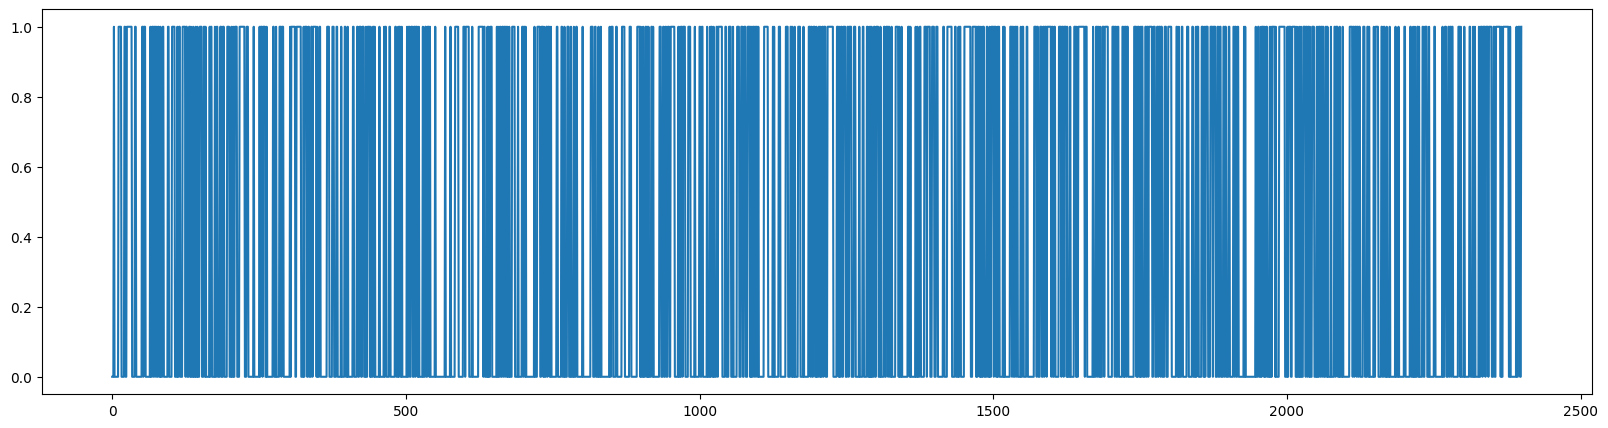

In [19]:
bitstream = ''.join(f"{int(h, 16):016b}" for h in TRNG)  # Each hex is converted to 16-bit binary
bit_array = [int(bit) for bit in bitstream]
plt.figure(figsize=(20,5))
plt.plot(bit_array)
print("p = ", np.mean(bit_array))
print("total no: TRNG = ", len(bit_array))

In [ ]:
np.savez("TRNG_openloop__2.4.25.npz", bit_array)

p =  0.3809444104369118
total no: TRNG =  627312


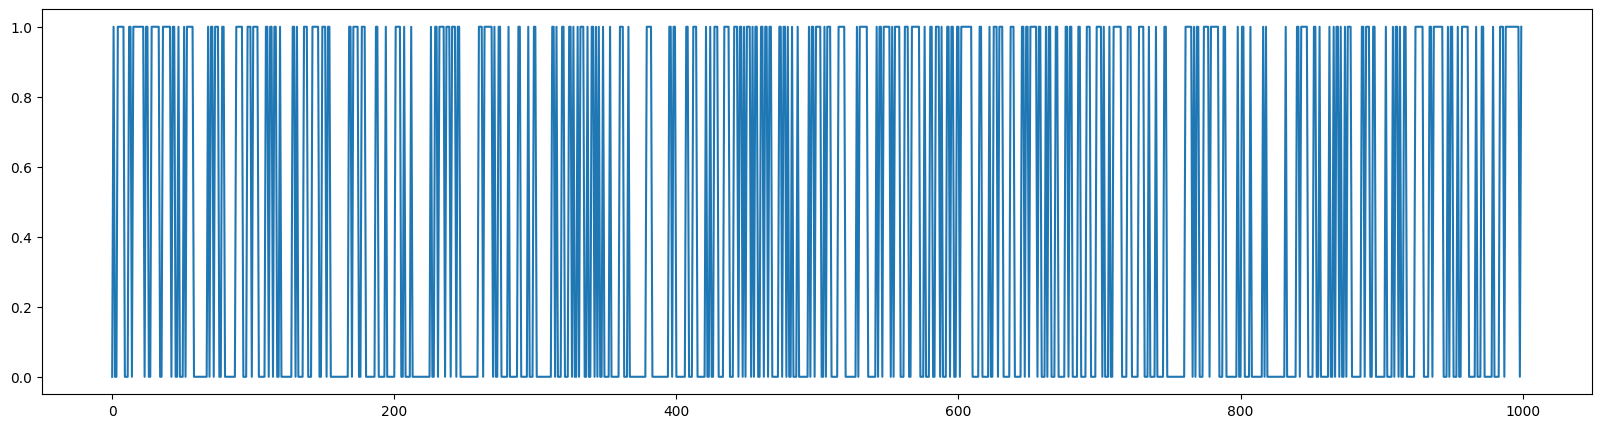

In [33]:
def hex_file_to_bitstream(file_path):
    with open(file_path, "r") as file:
        hex_values = [line.strip() for line in file if line.strip()]  # Read and clean lines

    # Convert each hex value to a 16-bit binary representation
    bitstream = ''.join(f"{int(h, 16):016b}" for h in hex_values)

    # Convert binary string into a list of bits (0s and 1s)
    bit_array = [int(bit) for bit in bitstream]

    return bit_array

# Example usage
file_path = "openloop_bits_2_4_25.txt"  # Replace with your actual file path
bit_array = hex_file_to_bitstream(file_path)
plt.figure(figsize=(20,5))
plt.plot(bit_array[0:1000])
print("p = ", np.mean(bit_array))
print("total no: TRNG = ", len(bit_array))

output_file = "bitstream_openloop_2_4_25.txt"
with open(output_file, "w") as file:
        file.write(''.join(map(str, bit_array)) + "\n")  # Save as continuous bitstream
